### Notebook to make the figure visualising a cNN fit 

In [2]:
using JLD2
using DataFrames
using CSV
using ComponentArrays
using Lux
using CairoMakie



In [6]:
data_02 = load("C:/Users/20192809/OneDrive - TU Eindhoven/TUe/Thesis/Synthetic data tests/Robustness sets/four_group_data_noise_0.2.RData")["data"]

Row,ID,time,k5,k6,k6_sq,k6_lin,k5_lin,group
,Int32,Int32,Float64,Float64,Float64?,Float64?,Float64?,Cat…
1,1,0,0.0391032,2.97238,missing,missing,missing,1
2,1,1,0.0424939,3.00846,missing,missing,missing,1
3,1,2,0.0402069,3.20581,missing,missing,missing,1
4,1,3,0.0407375,2.84819,missing,missing,missing,1
5,1,4,0.038901,2.94652,missing,missing,missing,1
6,2,0,0.0419585,3.04318,-0.08,0.25,-0.1,2
7,2,1,0.0366412,3.52328,-0.08,0.25,-0.1,2
8,2,2,0.0311107,3.75443,-0.08,0.25,-0.1,2
9,2,3,0.0287966,2.85401,-0.08,0.25,-0.1,2


In [4]:
result_02 = load("../../Data/results_robustness_100runs_2conditionals_noise_0.2.jld2")


conditionals_test = result_02["conditionals_test"]
class_vector = result_02["class_vector"];
conditional_training = result_02["conditionals_training"]
test_errors = result_02["test_errors"]
n_model = argmin(test_errors)
conditionals_training_model1_c1 = conditional_training[n_model][1:2:end,1]
conditionals_training_model1_c2 = conditional_training[n_model][2:2:end,1];


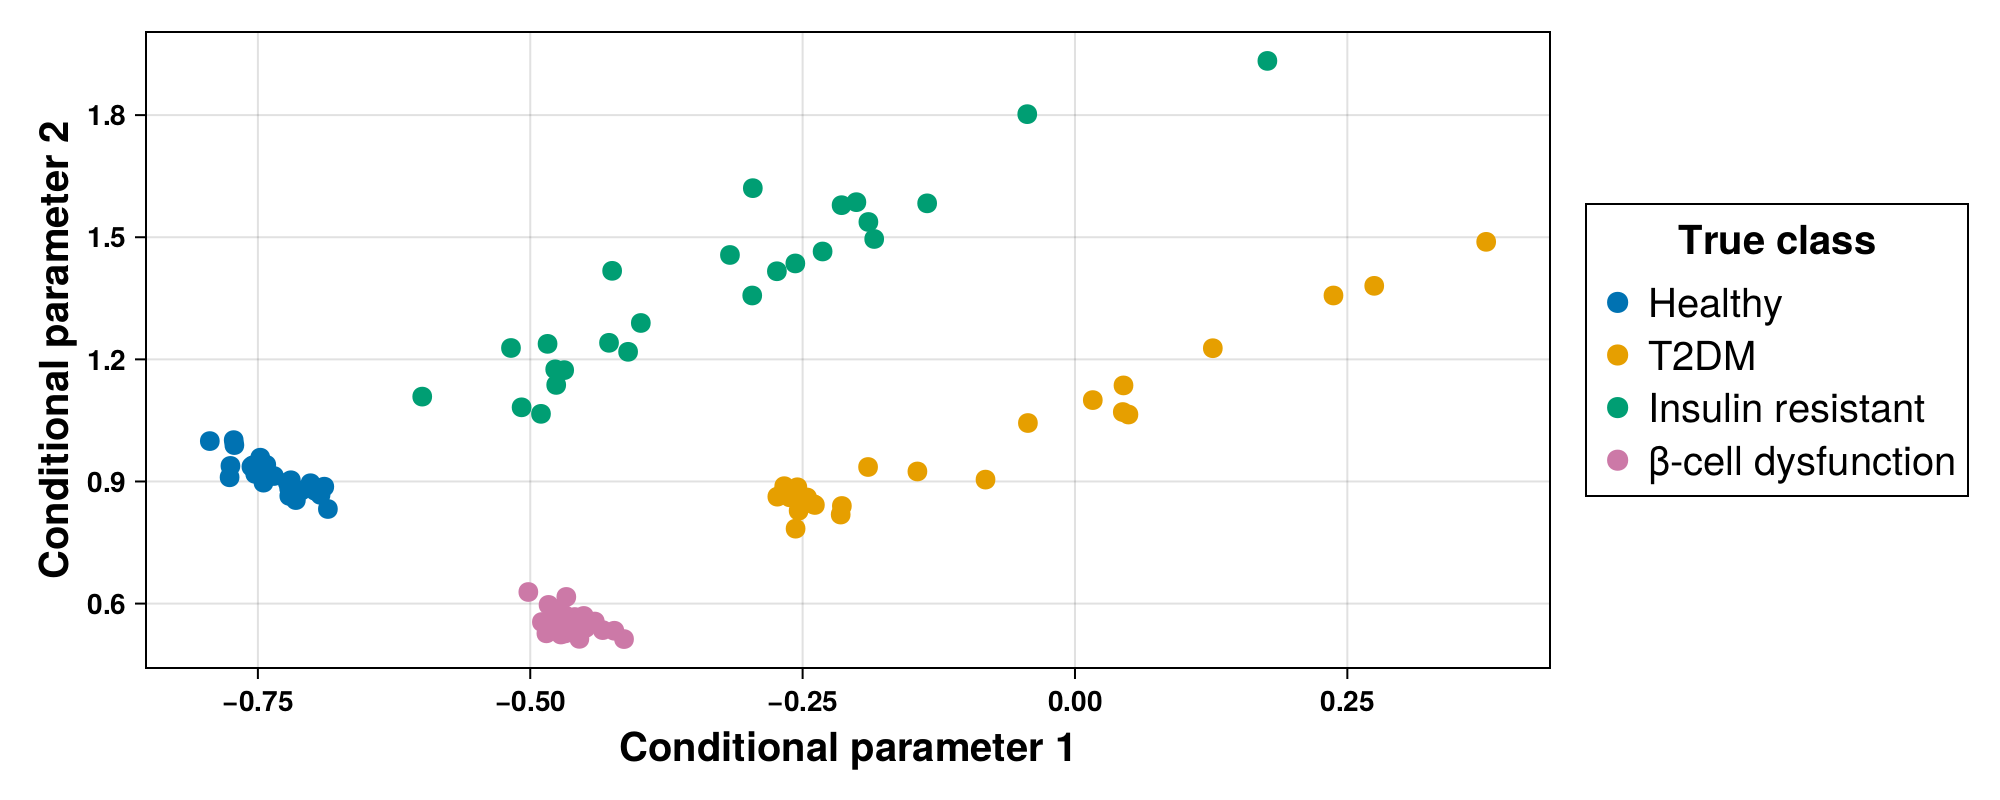

CairoMakie.Screen{IMAGE}


In [11]:
# Use Makie.wong_colors() for colormap
wong_colors = Makie.wong_colors()[1:4]


# Create the figure with the specified size
fig = Figure(size = (1000, 400))  # Adjusted width to accommodate the legend
class_vector = repeat([1,2,3,4], outer = 25)

# First subplot (axis) for the scatter plot
ax = CairoMakie.Axis(fig[1, 1], xlabel = "Conditional parameter 1", ylabel = "Conditional parameter 2",
          xlabelsize = 20, ylabelsize = 20, xticklabelsize = 14, yticklabelsize = 14, 
          xlabelfont = :bold, ylabelfont = :bold, xticklabelfont = :bold, yticklabelfont = :bold)

# Scatter plot of all individuals coloured by cluster assignments
scatter!(ax, conditionals_training_model1_c1, conditionals_training_model1_c2, color=class_vector, colormap=wong_colors, markersize = 14)

# Create the legend dynamically for the dots (clusters) and crosses (cluster centres)
dot_legend = [MarkerElement(color = wong_colors[i], marker = :circle, markersize = 15) for i in 1:4]

# Combine the legend entries and labels
legend_labels = vcat(["Healthy", "T2DM", "Insulin resistant", "β-cell dysfunction"])

# Add the legend
Legend(fig[1, 2], dot_legend, legend_labels, "True class", titlesize = 20, titlefont = :bold, labelsize = 20,  titleposition = :top)


# Show the plot
display(fig)

# save the plot
save("./cNN_example_fit.png", fig)
